# Assignment 1
## Collaborative Work from Adrian Bremer & Philipp Reinig

In [1]:
import tensorflow as tf

tf.__version__

2023-10-11 08:46:09.225878: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 08:46:09.343461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-11 08:46:09.343508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-11 08:46:09.343891: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-11 08:46:09.397242: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 08:46:09.398329: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

'2.14.0'

# MNIST-Tutorial 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

## Viewing the first date

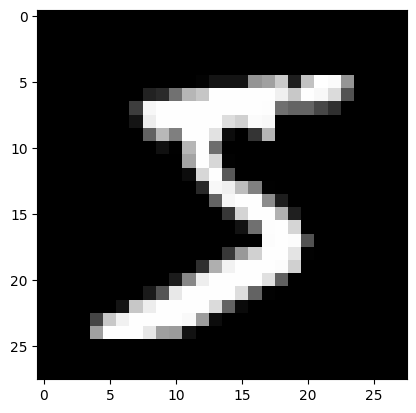

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

## Setting up and training the model

In [4]:
train_steps = 1000
learning_rate = 0.1

W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))


for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

print("Done!")

Loss: 2.3025851249694824 Accuracy: 0.0546875
Loss: 0.6568050384521484 Accuracy: 0.828125
Loss: 0.5055078268051147 Accuracy: 0.8515625
Loss: 0.41407546401023865 Accuracy: 0.8828125
Loss: 0.3186103105545044 Accuracy: 0.953125
Loss: 0.33990585803985596 Accuracy: 0.90625
Loss: 0.41186651587486267 Accuracy: 0.875
Loss: 0.287309855222702 Accuracy: 0.9375
Loss: 0.36369800567626953 Accuracy: 0.8828125
Loss: 0.3414457440376282 Accuracy: 0.8828125
Done!


## Testing

In [5]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.909, shape=(), dtype=float32)


# Building a Deep Model

## Hidden Layer
Using a variable size "N" for the hidden layer.
The previous layer with 10 Outputs represents the Output-Layer. 
Therefore, the hidden weights get a shape of Nx784 and the Output-Weights will get a shape of 10xN.

In [12]:
N = 20

def init(hidden_size):
    # initialising weights with small random values
    # and biases with small positive values (alternatively with zeros)
    W_ih = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(784, hidden_size)).astype(np.float32))
    b_h = tf.Variable(np.random.uniform(low=0.0, high=0.1, size=hidden_size).astype(np.float32))
    W_ho = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(hidden_size, 10)).astype(np.float32))
    b_o = tf.Variable(np.random.uniform(low=0.0, high=0.1, size=10).astype(np.float32))
    
    return (W_ih, b_h, W_ho, b_o)


def train(net):
    """returns the loss and accuracy after 1000 iterations"""

    W_ih, b_h, W_ho, b_o = net
    

    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        with tf.GradientTape() as tape:
            tape.watch([W_ih, b_h, W_ho, b_o])

            hidden_logits = tf.matmul(img_batch, W_ih) + b_h
            # DON'T USE SOFTMAX HERE - IT IS AWFUL!
            hidden_softmax = tf.nn.relu(hidden_logits)

            logits = tf.matmul(hidden_softmax, W_ho) + b_o
            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=logits, labels=lbl_batch))

        grads = tape.gradient(xent, [W_ih, b_h, W_ho, b_o])
        W_ih.assign_sub(learning_rate * grads[0])
        b_h.assign_sub(learning_rate * grads[1])
        W_ho.assign_sub(learning_rate * grads[2])
        b_o.assign_sub(learning_rate * grads[3])

        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                                 tf.float32))
            #print("Loss: {} Accuracy: {}".format(xent, acc))

    #print("Done!")
    
    #return (xent,acc)
    
train(init(N))
print("Done")

Done


## Find best size N for hidden layer 

N = 10, acc=0.9100000262260437
N = 11, acc=0.911899983882904
N = 12, acc=0.9115999937057495
N = 13, acc=0.9187999963760376
N = 14, acc=0.9138000011444092
N = 15, acc=0.9229999780654907
N = 16, acc=0.9196000099182129
N = 17, acc=0.9156000018119812
N = 18, acc=0.9244999885559082
N = 19, acc=0.9182000160217285
N = 20, acc=0.9204000234603882
N = 21, acc=0.9197999835014343
N = 22, acc=0.9199000000953674
N = 23, acc=0.9205999970436096
N = 24, acc=0.9226999878883362
N = 25, acc=0.9210000038146973
N = 26, acc=0.9264000058174133
N = 27, acc=0.9217000007629395
N = 28, acc=0.9258999824523926
N = 29, acc=0.9218999743461609
N = 30, acc=0.9200999736785889
N = 31, acc=0.9226999878883362
N = 32, acc=0.921999990940094
N = 33, acc=0.9208999872207642
N = 34, acc=0.9221000075340271
N = 35, acc=0.9211999773979187
N = 36, acc=0.9251999855041504
N = 37, acc=0.9253000020980835
N = 38, acc=0.9248999953269958
N = 39, acc=0.9240999817848206
N = 40, acc=0.9222999811172485
N = 41, acc=0.9257000088691711
N = 42, ac

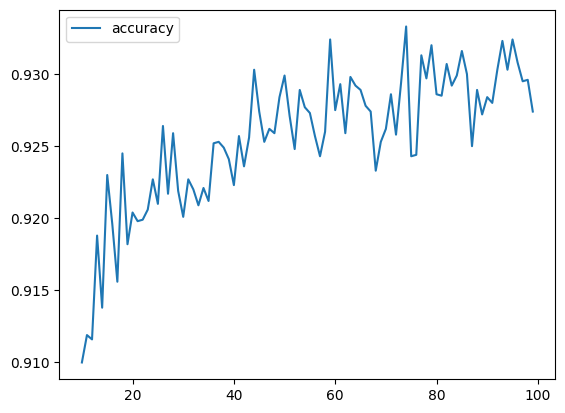

In [14]:
#losses = []
accs = []
sizes = np.arange(10,100, dtype=np.int32)

for n in sizes:
    W_ih, b_h, W_ho, b_o = init(n)
    train((W_ih, b_h, W_ho, b_o))
    
    # Testing
    hidden_logits = tf.matmul(data.test_data, W_ih) + b_h
    hidden_relu = tf.nn.relu(hidden_logits)
    logits = tf.matmul(hidden_relu, W_ho) + b_o
    test_preds = tf.argmax(tf.nn.softmax(logits), axis=1, output_type=tf.int32)
    
    acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                                 tf.float32))
    
    #losses.append(loss)
    accs.append(acc)
    
    print("N = {}, acc={}".format(n, acc))
    

plt.plot(sizes, accs, label='accuracy')
plt.legend()

plt.savefig('plot.svg')
plt.show()

## Questions

### Why don't initialise with 0?
Because then the hidden layer is producing - no matter the input - the same output in the first iteration. 
And even worse: During backpropagation no weights get changed, because every needed change is multiplied by zero (in the hidden layer).

## Experiments

### Different activation functions
First we used softmax in the hidden layer. This produced a maximum accuracy of 0.5 and a minimum loss of more than 1. So we switched to ReLU for the hidden layer and we got accuracy over 90% and a loss of about 0.1

### Different hidden layer sizes
<img src="plt_acc_same-test-batch.svg">

Like one can see in the diagram the more nodes we have inside the hidden layer, the more accuracy can be reached after a fixed amount of iterations (1000). There are some varaitions, but we did only 1 run. But the tendence is clear.

But we have to consider that after about 40 nodes in the hidden layer, the improvements are negetibly small. Therefore, one shouldn't choose a much bigger hidden layer because we don't gain that much more performance for the huge amounts of extra computation for bigger layers.

### Different weight initializations
**_TODO_**


## Tensorflow Interface

### Suggestions for High-level interfaces
- initialization inside a constructor where you specify the layer sizes - probably with options to tell how to initialize 
- feed forward in one method (matrix multiplication an addition with straight forward pattern) -> for really deep networks really tidious
- use this feed forward method inside a train method -> does back propagation for the user (again: straight forward pattern)

### Wishes for currently missing features
- **_TODO_**

### redundant information
You get forced a lot to give redundant information. E.G. Specify the sizes of the matrices, but they depend on the layer sizes, specify the feed forward calculations for every single layer, even it is a mechanical task, tell the GradientTape which variables to differentiate by and subtract the changes from every single weight matrix and bias vector. 
This can easily be packaged inside the specified methods.
